#                     Building a Regression Model

In [15]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

##  Load the dataset.

In [2]:
data = pd.read_csv('abalone.csv')
data = data.iloc[:,3:]
data

,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...
4172,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.150,1.0945,0.5310,0.2610,0.2960,10


##  Visualization process

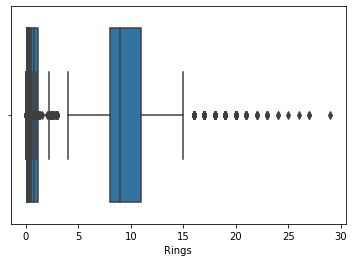

In [3]:
# 1. Univariate Analysis
for col in data.columns:
  if data.dtypes[col]=='int64' or data.dtypes[col]=='float64':
    sns.boxplot(x=data[col]).set(xlabel=col)

C:\Users\sgsan\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


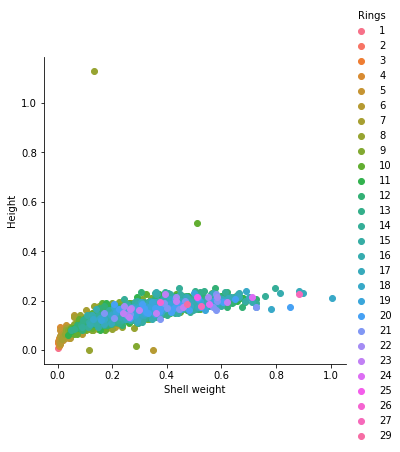

In [4]:
# 2. Bi-Variate Analysis
sns.FacetGrid(data,hue='Rings',size=5).map(plt.scatter,"Shell weight","Height").add_legend()

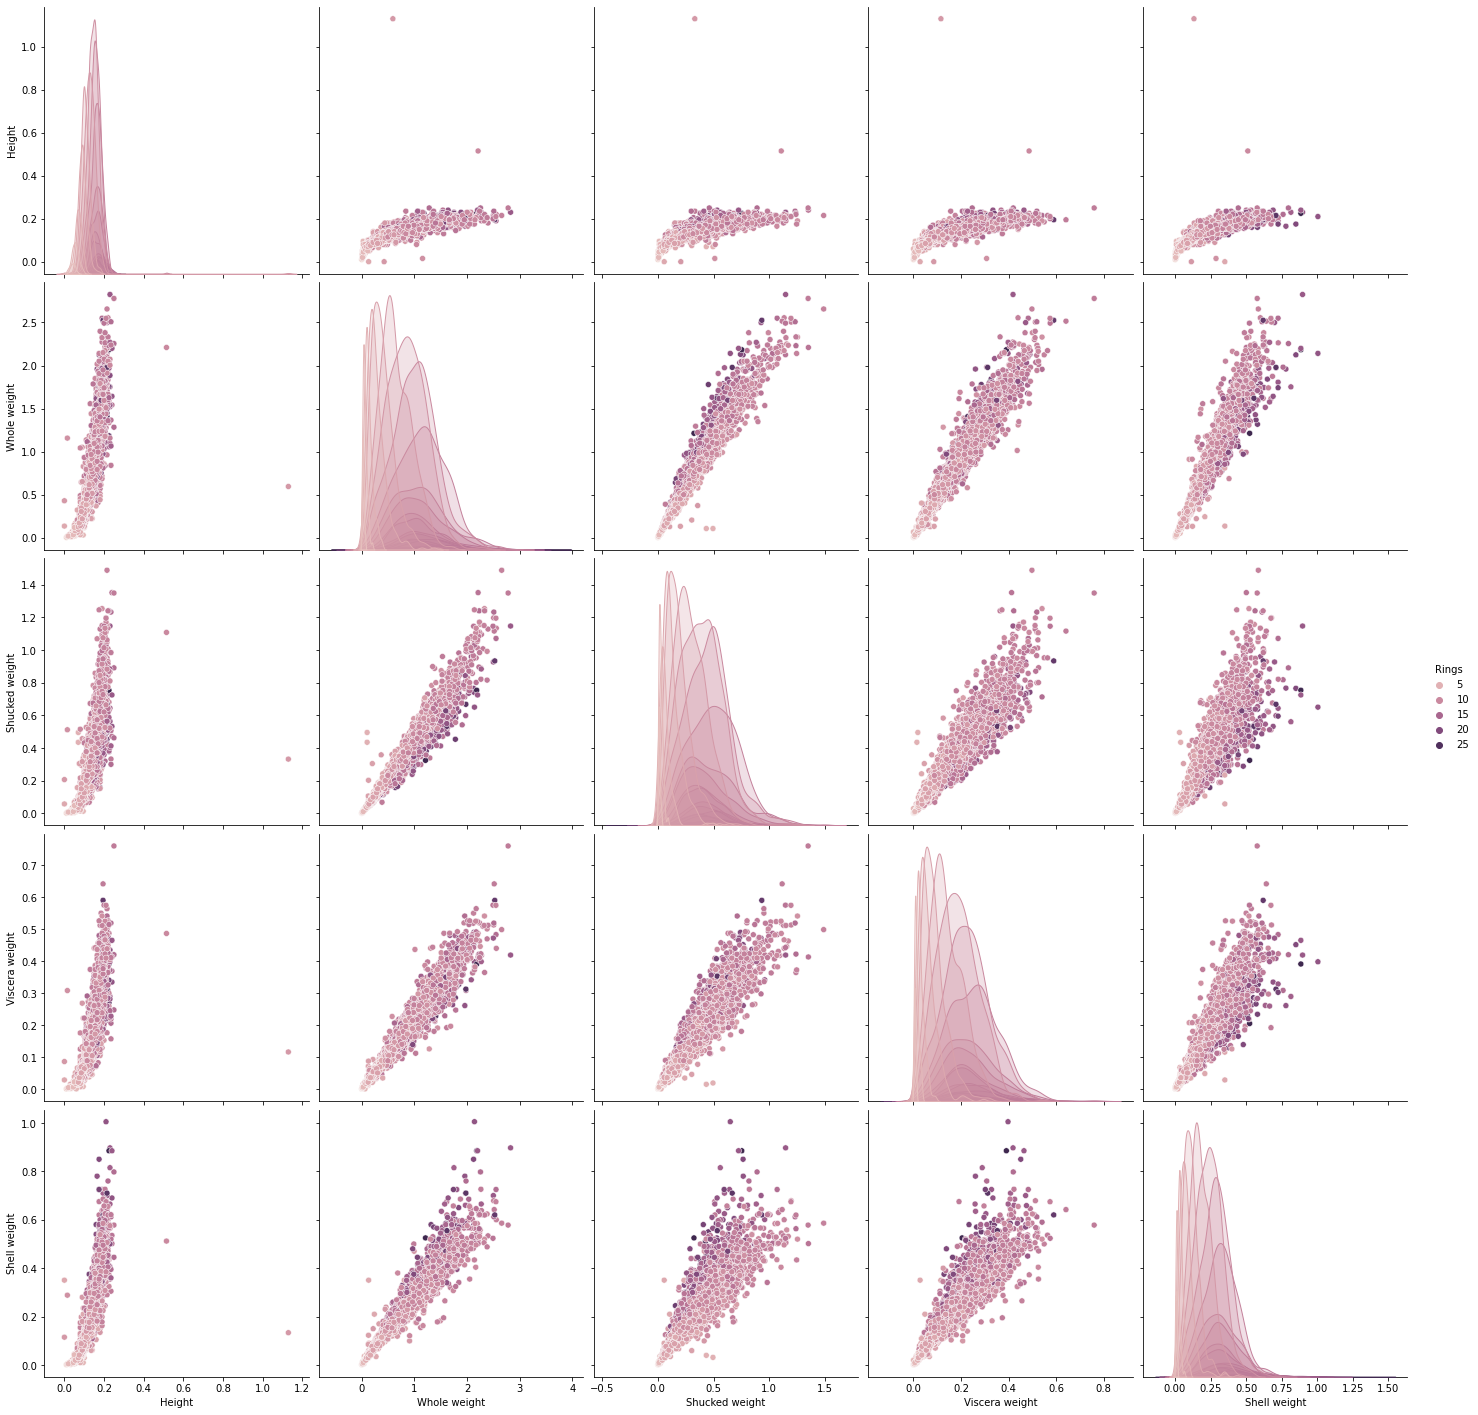

In [5]:
# 3. Multi-Variate Analysis
sns.pairplot(data,hue='Rings',height=4)

##  Descriptive Statistics

In [6]:
data.describe()

,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


##  Handle the missing values

In [7]:
data.isnull().sum()

Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

##  Find and Replace the outliers

In [10]:
credit = data.loc[data['Height']<400, 'Height'].median()
prod = data.loc[data['Rings']>=3.5, 'Rings'].median()
data.loc[data.Height<400, 'Height']=np.nan
data.fillna(credit,inplace=True)
data.loc[data.Rings>3.5, 'Rings']=np.nan
data.fillna(prod,inplace=True)

##  Perform encoding for Categorical Columns

In [11]:
label = LabelEncoder()
data['Whole weight'] = label.fit_transform(data['Whole weight'])
data['Shucked weight'] = label.fit_transform(data['Shucked weight'])

##  Dependent and Independent variables

In [12]:
dep = data.iloc[:,-1:]
indep = data.iloc[:,:-1]

##  Scale the independent variables

In [13]:
indep_var = MinMaxScaler()
show_indep = indep_var.fit_transform(indep)

##  Splitting Train and Test Data

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(show_indep, dep, test_size=0.3)
print(xtrain,xtest,ytrain,ytest)

[[0.         0.11532125 0.09709379 0.06912442 0.07324365]
 [0.         0.684514   0.5997358  0.39697169 0.29745889]
 [0.         0.12850082 0.14398943 0.0684661  0.05829596]
 ...
 [0.         0.56713344 0.48018494 0.24292298 0.26258097]
 [0.         0.40032949 0.33751651 0.2244898  0.20279023]
 [0.         0.69275124 0.48282695 0.33903884 0.3472845 ]] [[0.         0.42339374 0.37978864 0.22646478 0.21773792]
 [0.         0.9839374  0.98018494 0.5036208  0.52466368]
 [0.         0.73476112 0.68097754 0.33245556 0.34230194]
 ...
 [0.         0.39044481 0.38903567 0.18104016 0.18734429]
 [0.         0.89991763 0.7675033  0.47465438 0.46686597]
 [0.         0.44892916 0.42073976 0.18696511 0.22272048]]       Rings
2248   10.0
1373   10.0
3474   10.0
1892   10.0
2983   10.0
...     ...
4123   10.0
2891   10.0
628    10.0
13     10.0
2211   10.0

[2923 rows x 1 columns]       Rings
3383   10.0
1418   10.0
2604   10.0
19     10.0
3157   10.0
...     ...
346    10.0
2280   10.0
1119   10.0
763

In [16]:
# visualize 1st 5 rows

data.head()

,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.14,715,417,0.1010,0.150,10.0
1,0.14,285,178,0.0485,0.070,10.0
2,0.14,962,480,0.1415,0.210,10.0
3,0.14,718,400,0.1140,0.155,10.0
4,0.14,253,159,0.0395,0.055,10.0


In [17]:
data['Height'].unique()

array([0.14])

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

## Build model

In [25]:
import statsmodels.formula.api as smf

In [27]:
model=smf.ols("Height~Rings",data=data).fit()

## Test model

In [28]:
model.params

Intercept    1.400000e-01
Rings        8.805077e-17
dtype: float64

In [29]:
model.rsquared , model.rsquared_adj

(-3710.8563562365334, -3711.745423627249)